In [1]:
import pandas as pd

file_path = 'G:/Hangkai/Forest_edge_mapping_data/processed_country_data_with_area.csv'
country_data = pd.read_csv(file_path)

china_row = country_data[country_data['country'] == 'China']
taiwan_row = country_data[country_data['country'] == 'Taiwan']

if not china_row.empty and not taiwan_row.empty:
    columns_to_sum = country_data.columns.difference(['country'])
    for column in columns_to_sum:
        country_data.loc[country_data['country'] == 'China', column] += taiwan_row[column].values[0]
    country_data = country_data[country_data['country'] != 'Taiwan']

country_data.head()


C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\hyou34\AppData\Local\Temp\ipykernel_87336\3443941564.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with

country        stable  stable_per2000  stable_per2020  increase increase  \
0  Indonesia  2.932940e+06        0.547937        0.585812        377782.3233   
1   Malaysia  2.921738e+05        0.423681        0.383578         63868.5001   
2      Chile  1.523514e+06        0.791067        0.838995        138571.9005   
3    Bolivia  1.548777e+06        0.719363        0.738685        158406.1880   
4       Peru  9.658076e+05        0.769824        0.708248        107564.7010   

   increase increase percent  increase decrease  increase decrease percent  \
0                   0.075456       1.695902e+06                   0.338732   
1                   0.083849       4.056648e+05                   0.532573   
2                   0.076311       1.537945e+05                   0.084694   
3                   0.075551       3.894838e+05                   0.185763   
4                   0.078880       2.902844e+05                   0.212872   

   decrease increase  decrease increase percent  ...  forest edge 2020  \
0       1.458103e+06                   0.272406  ...      5.006624e+06   
1       2.826837e+05                   0.409920  ...      7.617070e+05   
2       2.339075e+05                   0.121454  ...      1.815880e+06   
3       2.318779e+05                   0.107701  ...      2.096667e+06   
4       1.654066e+05                   0.131842  ...      1.363657e+06   

   Unchanged Forest Area  Increased Forest Area 2020  \
0           1.474394e+06                48603.287350   
1           2.752761e+05                10048.507260   
2           1.623306e+05                 7197.778945   
3           5.571181e+05                 6196.640349   
4           7.762328e+05                 4311.612493   

   Decreased Forest Area 2000  Total Forest Area 2000  Total Forest Area 2020  \
0                89282.524090            1.563676e+06            1.522997e+06   
1                21272.398800            2.965485e+05            2.853246e+05   
2                 7392.213558            1.697228e+05            1.695284e+05   
3                39615.066220            5.967332e+05            5.633148e+05   
4                11962.057580            7.881949e+05            7.805444e+05   

   decrease rate  increase rate  Area Change  Edge Change  
0       0.057098       0.031913    -0.026015    -0.064653  
1       0.071733       0.035218    -0.037848     0.104551  
2       0.043555       0.042458    -0.001146    -0.057125  
3       0.066387       0.011000    -0.056002    -0.026158  
4       0.015177       0.005524    -0.009706     0.086941  

[5 rows x 27 columns]

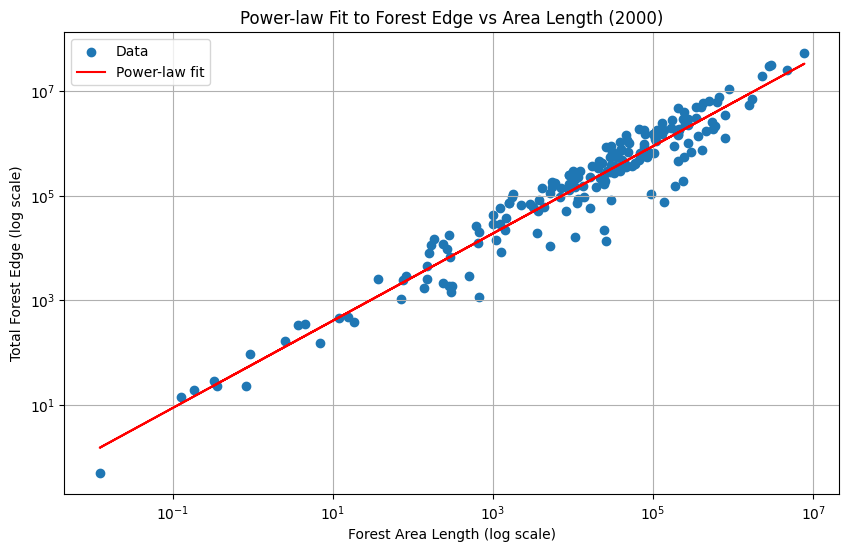

slope: 0.8334760974346985 exp(intercept): 59.533429226316336 r2: 0.9319987760236769 p_value: 1.606126225880505e-110


In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

log_forest_area = np.log(country_data['Total Forest Area 2000'])
log_forest_edge = np.log(country_data['forest edge 2000'])

slope, intercept, r_value, p_value, std_err = stats.linregress(log_forest_area, log_forest_edge)

def log_log_regression_model(log_x):
    return intercept + slope * log_x

log_estimated_forest_edge = log_log_regression_model(log_forest_area)
estimated_forest_edge = np.exp(log_estimated_forest_edge)

country_data['log_residuals2000'] = log_forest_edge - log_estimated_forest_edge
country_data['log_fragmentation_rank2000'] = country_data['log_residuals2000'].abs().rank(ascending=False)

plt.figure(figsize=(10, 6))
plt.scatter(country_data['Total Forest Area 2000'], country_data['forest edge 2000'], label='Data')
plt.plot(country_data['Total Forest Area 2000'], estimated_forest_edge, color='red', label='Power-law fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Forest Area Length (log scale)')
plt.ylabel('Total Forest Edge (log scale)')
plt.title('Power-law Fit to Forest Edge vs Area Length (2000)')
plt.legend()
plt.grid(True)
plt.show()

print('slope:', slope, 'exp(intercept):', np.exp(intercept), 'r2:', r_value*r_value, 'p_value:', p_value)

log_forest_edge_2020 = np.log(country_data['forest edge 2020'])
log_forest_area_2020 = np.log(country_data['Total Forest Area 2020'])

log_estimated_forest_edge_2020 = log_log_regression_model(log_forest_area_2020)
estimated_forest_edge_2020 = np.exp(log_estimated_forest_edge_2020)

country_data['log_residuals2020'] = log_forest_edge_2020 - log_estimated_forest_edge_2020
country_data['log_fragmentation_rank2020'] = country_data['log_residuals2020'].abs().rank(ascending=False)

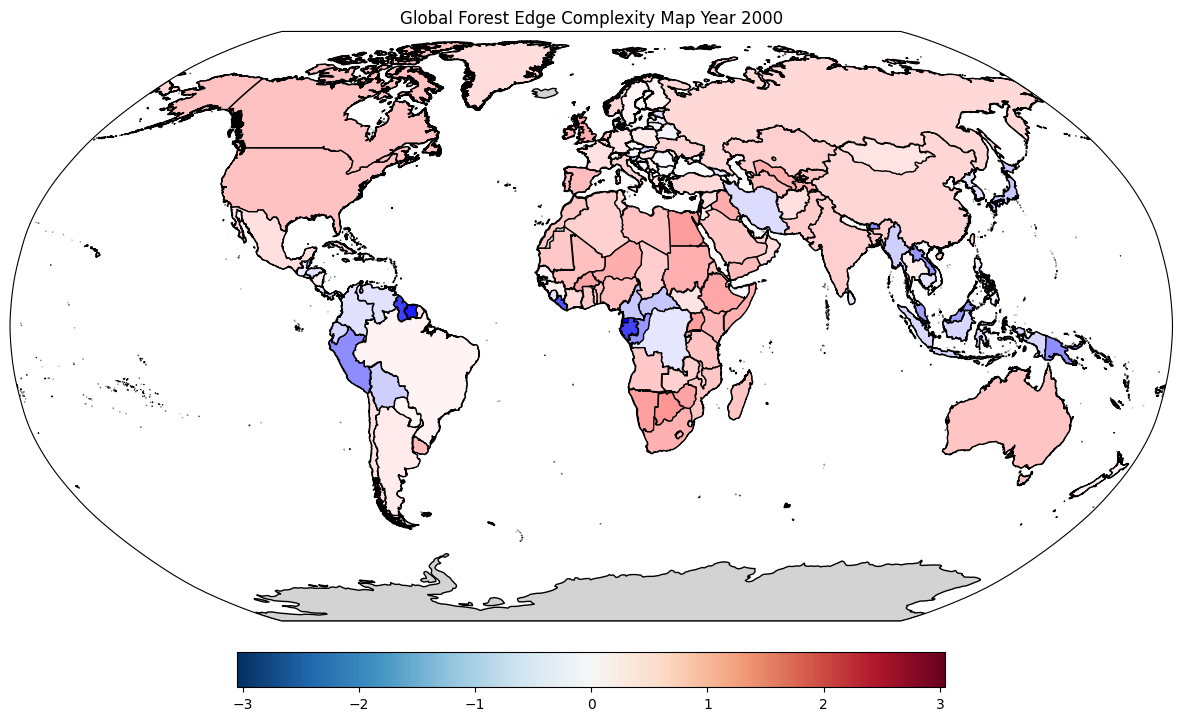

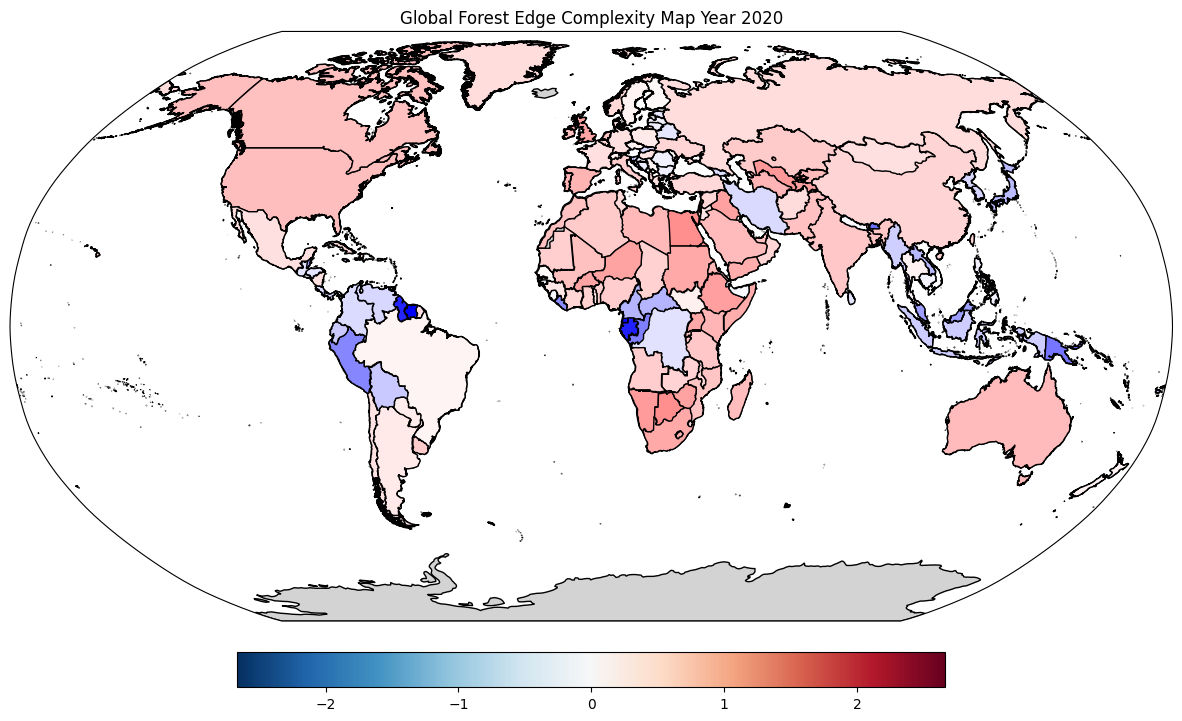

In [3]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.lines import Line2D
import matplotlib as mpl
import cartopy

def get_color(deviation, max_deviation):
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

def plot_inequality_map(year, residual_column):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

    shapename = 'admin_0_countries'
    countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

    max_deviation = max(abs(country_data[residual_column]))
    for country in shpreader.Reader(countries_shp).records():
        country_name = country.attributes['SOVEREIGNT']
        if country_name in country_data['country'].values:
            deviation = country_data[country_data['country'] == country_name][residual_column].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
        if country_name == "Taiwan":
            deviation = country_data[country_data['country'] == "China"][residual_column].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
            
    norm = mpl.colors.Normalize(vmin=-max_deviation, vmax=max_deviation)
    cmap = mpl.cm.RdBu_r
    scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = plt.colorbar(scalar_map, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
    plt.title(f'Global Forest Edge Complexity Map Year {year}')
    plt.show()

plot_inequality_map(2000, 'log_residuals2000')
plot_inequality_map(2020, 'log_residuals2020')

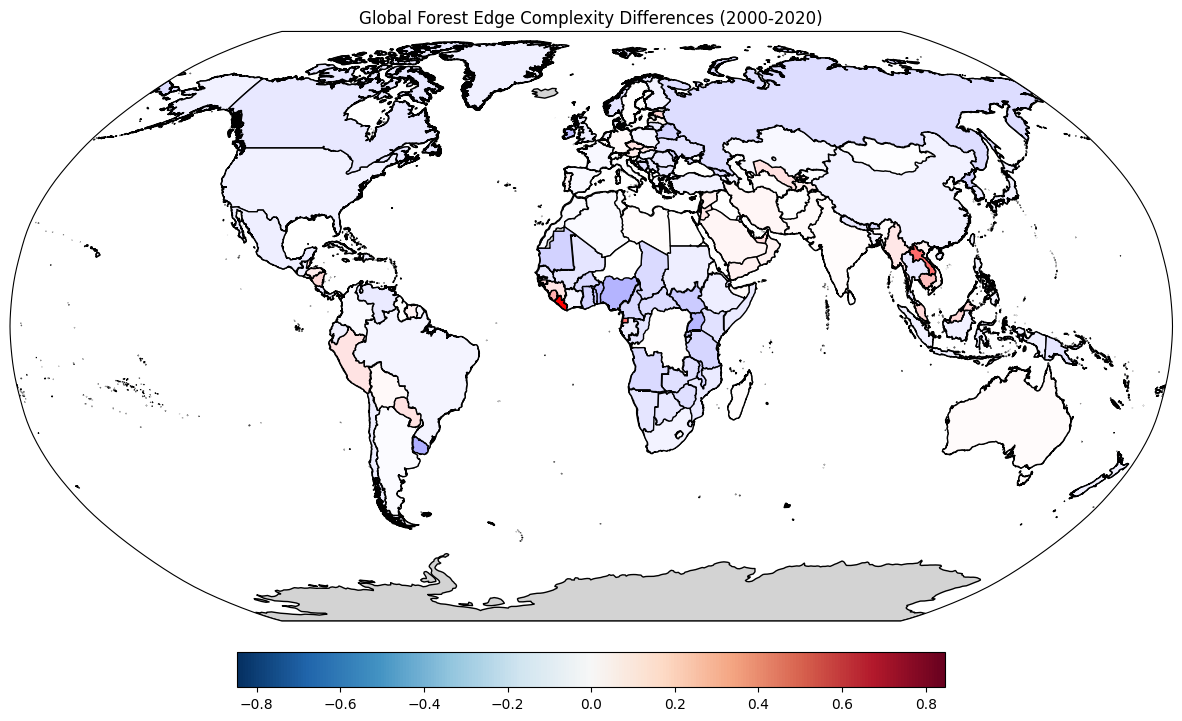

In [4]:
def plot_residuals_difference_map():
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

    shapename = 'admin_0_countries'
    countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

    max_deviation = max(abs(country_data['log_residuals2020'] - country_data['log_residuals2000']))
    for country in shpreader.Reader(countries_shp).records():
        country_name = country.attributes['SOVEREIGNT']
        if country_name in country_data['country'].values:
            deviation = country_data[country_data['country'] == country_name]['log_residuals2020'].values[0] - country_data[country_data['country'] == country_name]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
        if country_name == "Taiwan":
            deviation = country_data[country_data['country'] == "China"]['log_residuals2020'].values[0] - country_data[country_data['country'] == "China"]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
            
    norm = mpl.colors.Normalize(vmin=-max_deviation, vmax=max_deviation)
    cmap = mpl.cm.RdBu_r
    scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = plt.colorbar(scalar_map, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
    plt.title('Global Forest Edge Complexity Differences (2000-2020)')
    plt.show()

plot_residuals_difference_map()

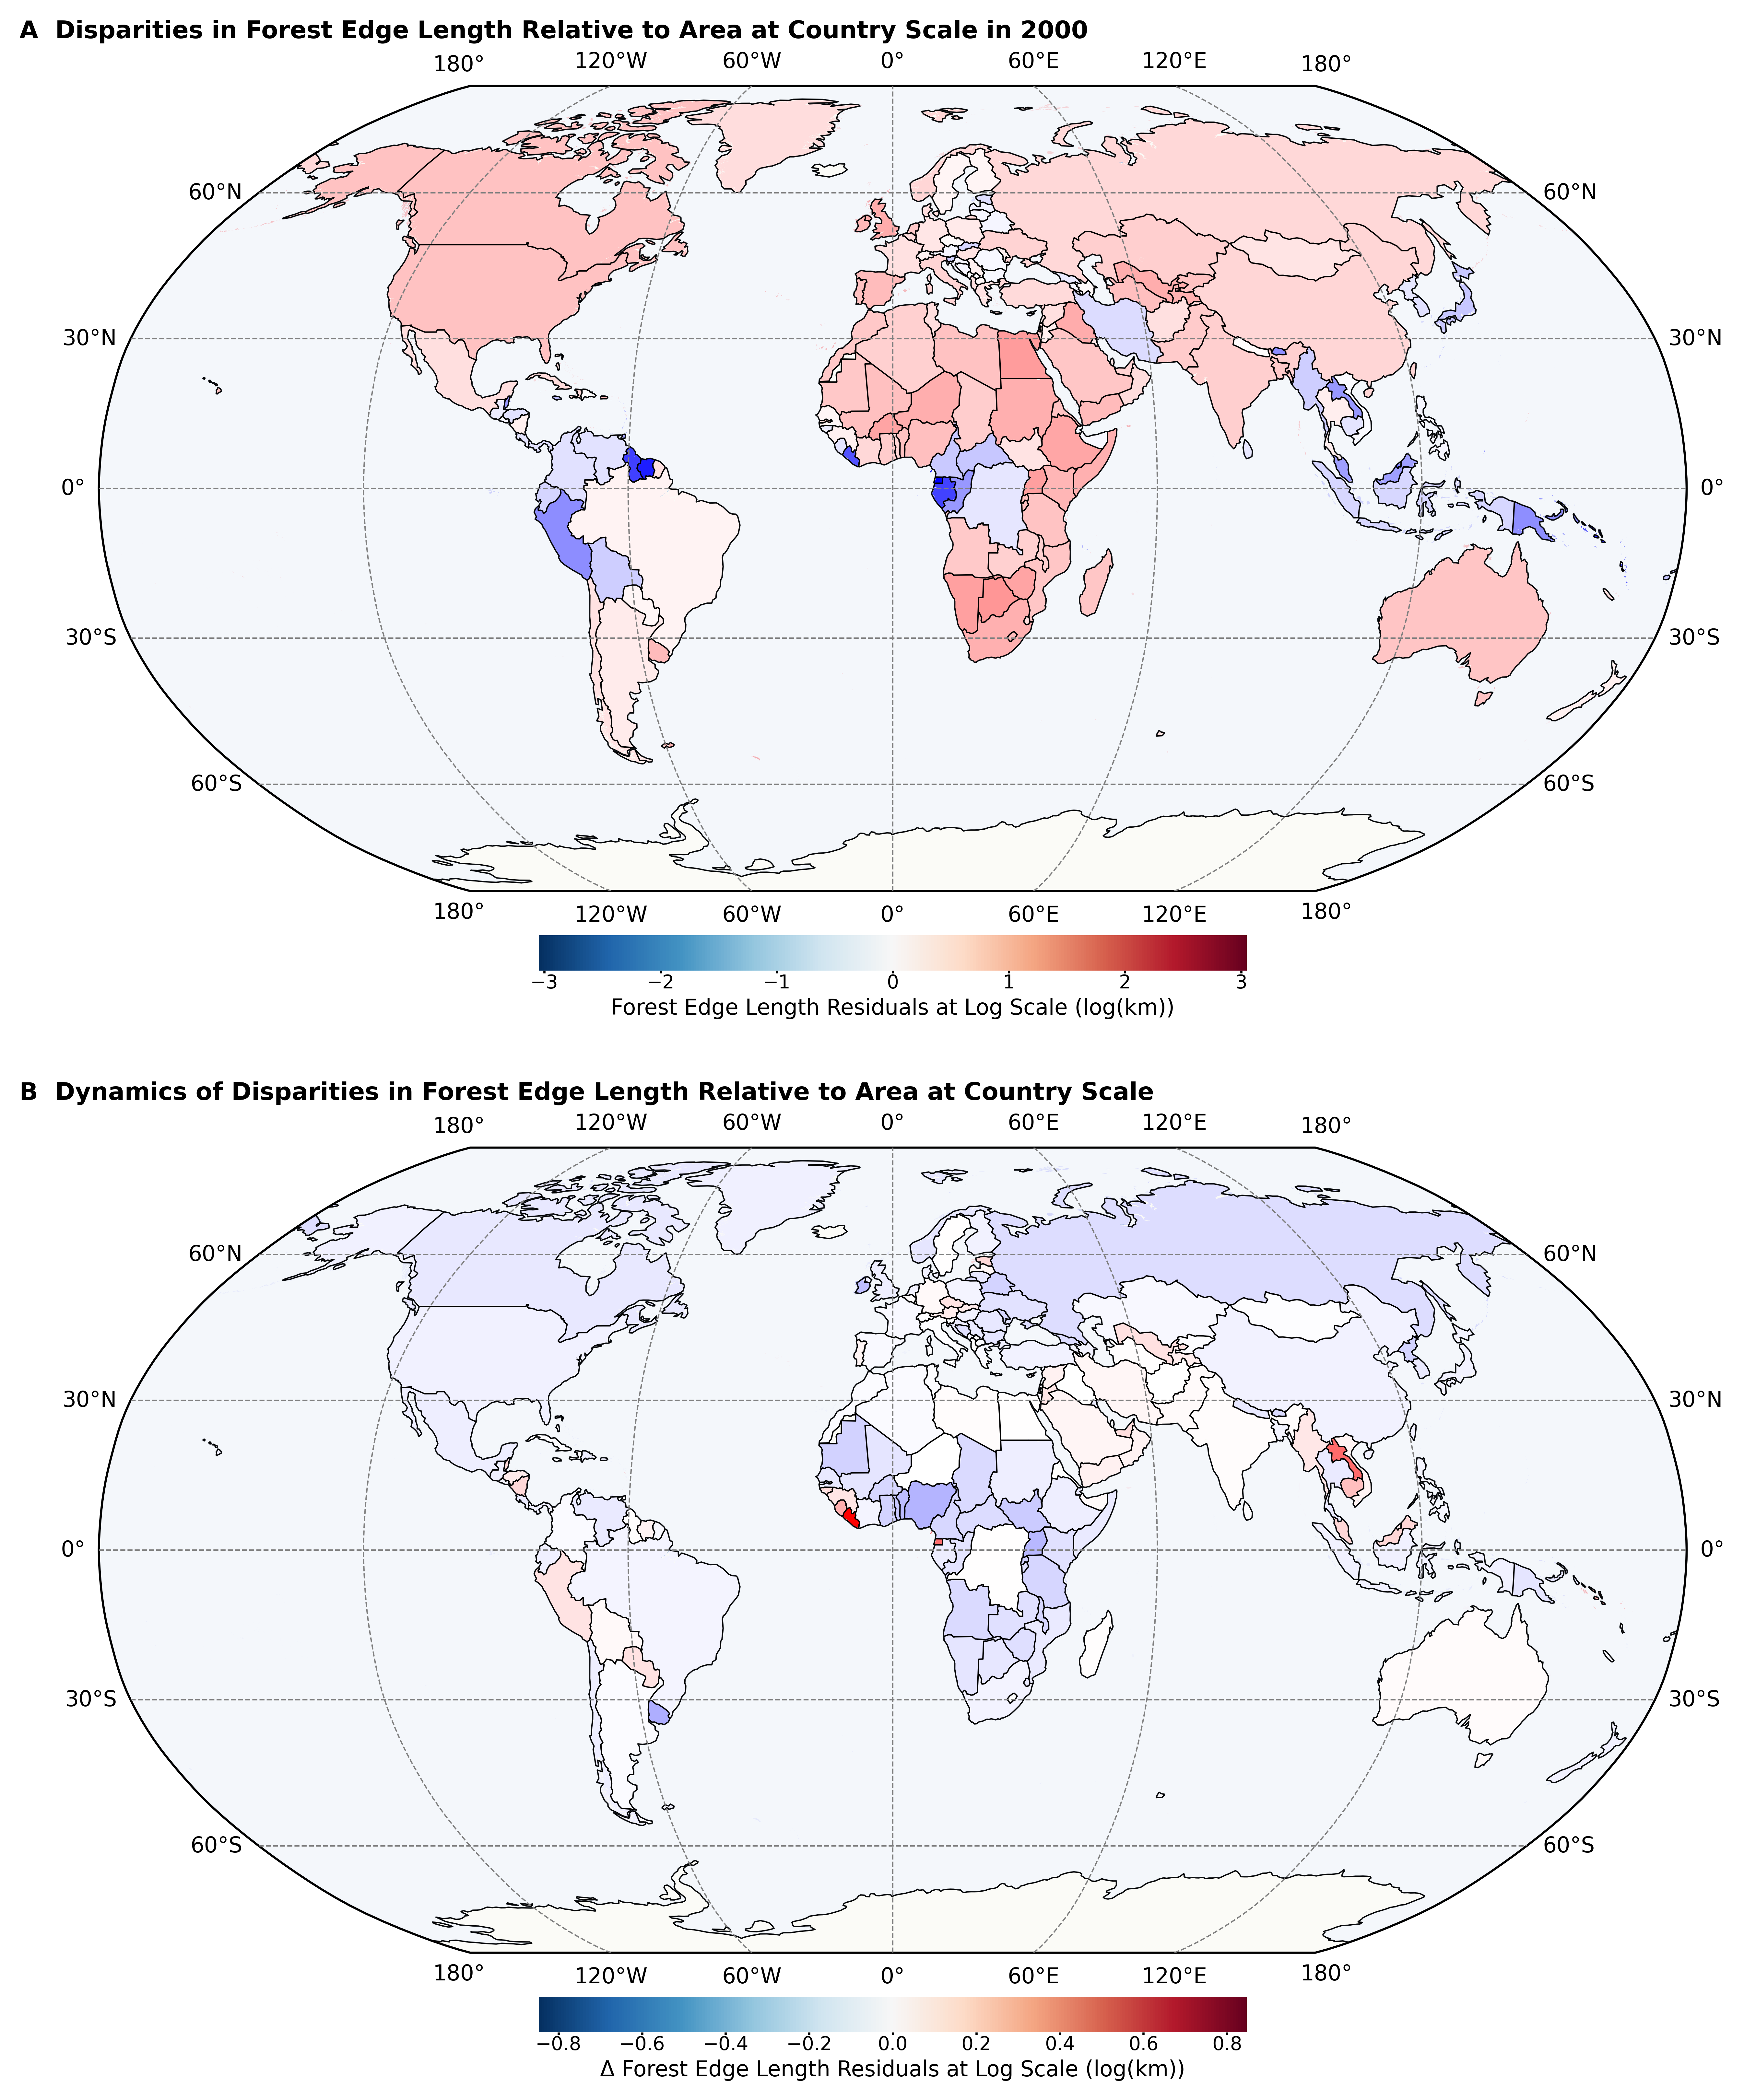

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.io.shapereader as shpreader
import matplotlib as mpl

def get_color(deviation, max_deviation):
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

def create_composite_map():
    fig = plt.figure(figsize=(15, 13), dpi = 600)
    config = {"font.family":'Helvetica'}
    plt.subplots_adjust(hspace =0.2)

    # Subfigure (a): Global Forest Edge Complexity Map for the Year 2000
    ax1 = fig.add_subplot(2, 1, 1, projection=ccrs.Robinson(central_longitude=0.0))
    ax1.set_extent([-179.999, 179.999, -90, 90])
    ax1.add_feature(cf.LAND, alpha=0.2)
    ax1.add_feature(cf.LAKES, alpha=0.5)
    ax1.add_feature(cf.OCEAN,alpha=0.1,zorder = 2)
    ax1.add_feature(cf.RIVERS, lw=0.21)
    ax1.add_feature(cf.STATES, lw=0.3, edgecolor='gray')
    ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', zorder=7,
                  xlabel_style = {'size': 8, 'color': 'black'}, ylabel_style = {'size': 8, 'color': 'black'})
    ax1.text(-0.05,1.06, 'A  Disparities in Forest Edge Length Relative to Area at Country Scale in 2000', transform=ax1.transAxes, fontsize = 9,fontweight='bold')

    countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
    max_deviation = max(abs(country_data['log_residuals2000']))
    #"""
    for country in shpreader.Reader(countries_shp).records():
        country_name = country.attributes['SOVEREIGNT']
        if country_name in country_data['country'].values:
            deviation = country_data[country_data['country'] == country_name]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation)
            ax1.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color)
        if country_name == "Taiwan":
            deviation = country_data[country_data['country'] == "China"]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation)
            ax1.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color)
    #"""
    ax1.add_feature(cf.BORDERS, linestyle='-', alpha=1,edgecolor='black', lw=0.5)
    ax1.add_feature(cf.COASTLINE, lw=0.5,alpha=1,edgecolor='black')

    norm1 = mpl.colors.Normalize(vmin=-max_deviation, vmax=max_deviation)
    cmap1 = mpl.cm.RdBu_r
    scalar_map1 = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap1)
    cbar1 = plt.colorbar(scalar_map1, ax=ax1, orientation='horizontal', fraction=0.04, pad=0.05)
    cbar1.outline.set_visible(False)
    cbar1.ax.tick_params(labelsize=7,pad = 0.1,length=1)
    cbar1.set_label('Forest Edge Length Residuals at Log Scale (log(km))',fontsize = 8,labelpad=2)

    # Subfigure (b): Changes in Global Forest Edge Complexity (2000-2020)
    ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.Robinson(central_longitude=0.0))
    ax2.set_extent([-179.999, 179.999, -90, 90])
    ax2.add_feature(cf.LAND, alpha=0.2)
    ax2.add_feature(cf.LAKES, alpha=0.5)
    ax2.add_feature(cf.OCEAN,alpha=0.1,zorder = 2)
    ax2.add_feature(cf.RIVERS, lw=0.2)
    ax2.add_feature(cf.STATES, lw=0.3, edgecolor='gray')
    ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--', zorder=7,
                 xlabel_style = {'size': 8, 'color': 'black'}, ylabel_style = {'size': 8, 'color': 'black'})
    ax2.text(-0.05,1.06, 'B  Dynamics of Disparities in Forest Edge Length Relative to Area at Country Scale', transform=ax2.transAxes, fontsize = 9,fontweight='bold')

    max_deviation_diff = max(abs(country_data['log_residuals2020'] - country_data['log_residuals2000']))
    
    #"""
    for country in shpreader.Reader(countries_shp).records():
        country_name = country.attributes['SOVEREIGNT']
        if country_name in country_data['country'].values:
            deviation = country_data[country_data['country'] == country_name]['log_residuals2020'].values[0] - country_data[country_data['country'] == country_name]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation_diff)
            ax2.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color)
        if country_name == "Taiwan":
            deviation = country_data[country_data['country'] == "China"]['log_residuals2020'].values[0] - country_data[country_data['country'] == "China"]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation_diff)
            ax2.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color)
    #"""
    ax2.add_feature(cf.BORDERS, linestyle='-', alpha=1,edgecolor='black', lw=0.5)
    ax2.add_feature(cf.COASTLINE, lw=0.5,alpha=1,edgecolor='black')
    
    norm2 = mpl.colors.Normalize(vmin=-max_deviation_diff, vmax=max_deviation_diff)
    cmap2 = mpl.cm.RdBu_r
    scalar_map2 = mpl.cm.ScalarMappable(norm=norm2, cmap=cmap2)
    cbar2 = plt.colorbar(scalar_map2, ax=ax2, orientation='horizontal', fraction=0.04, pad=0.05)
    cbar2.outline.set_visible(False)
    cbar2.ax.tick_params(labelsize=7,pad = 0.1,length=1)
    cbar2.set_label('\u0394 Forest Edge Length Residuals at Log Scale (log(km))',fontsize = 8,labelpad=2)
    
    # plt.tight_layout()
    plt.show()
create_composite_map()



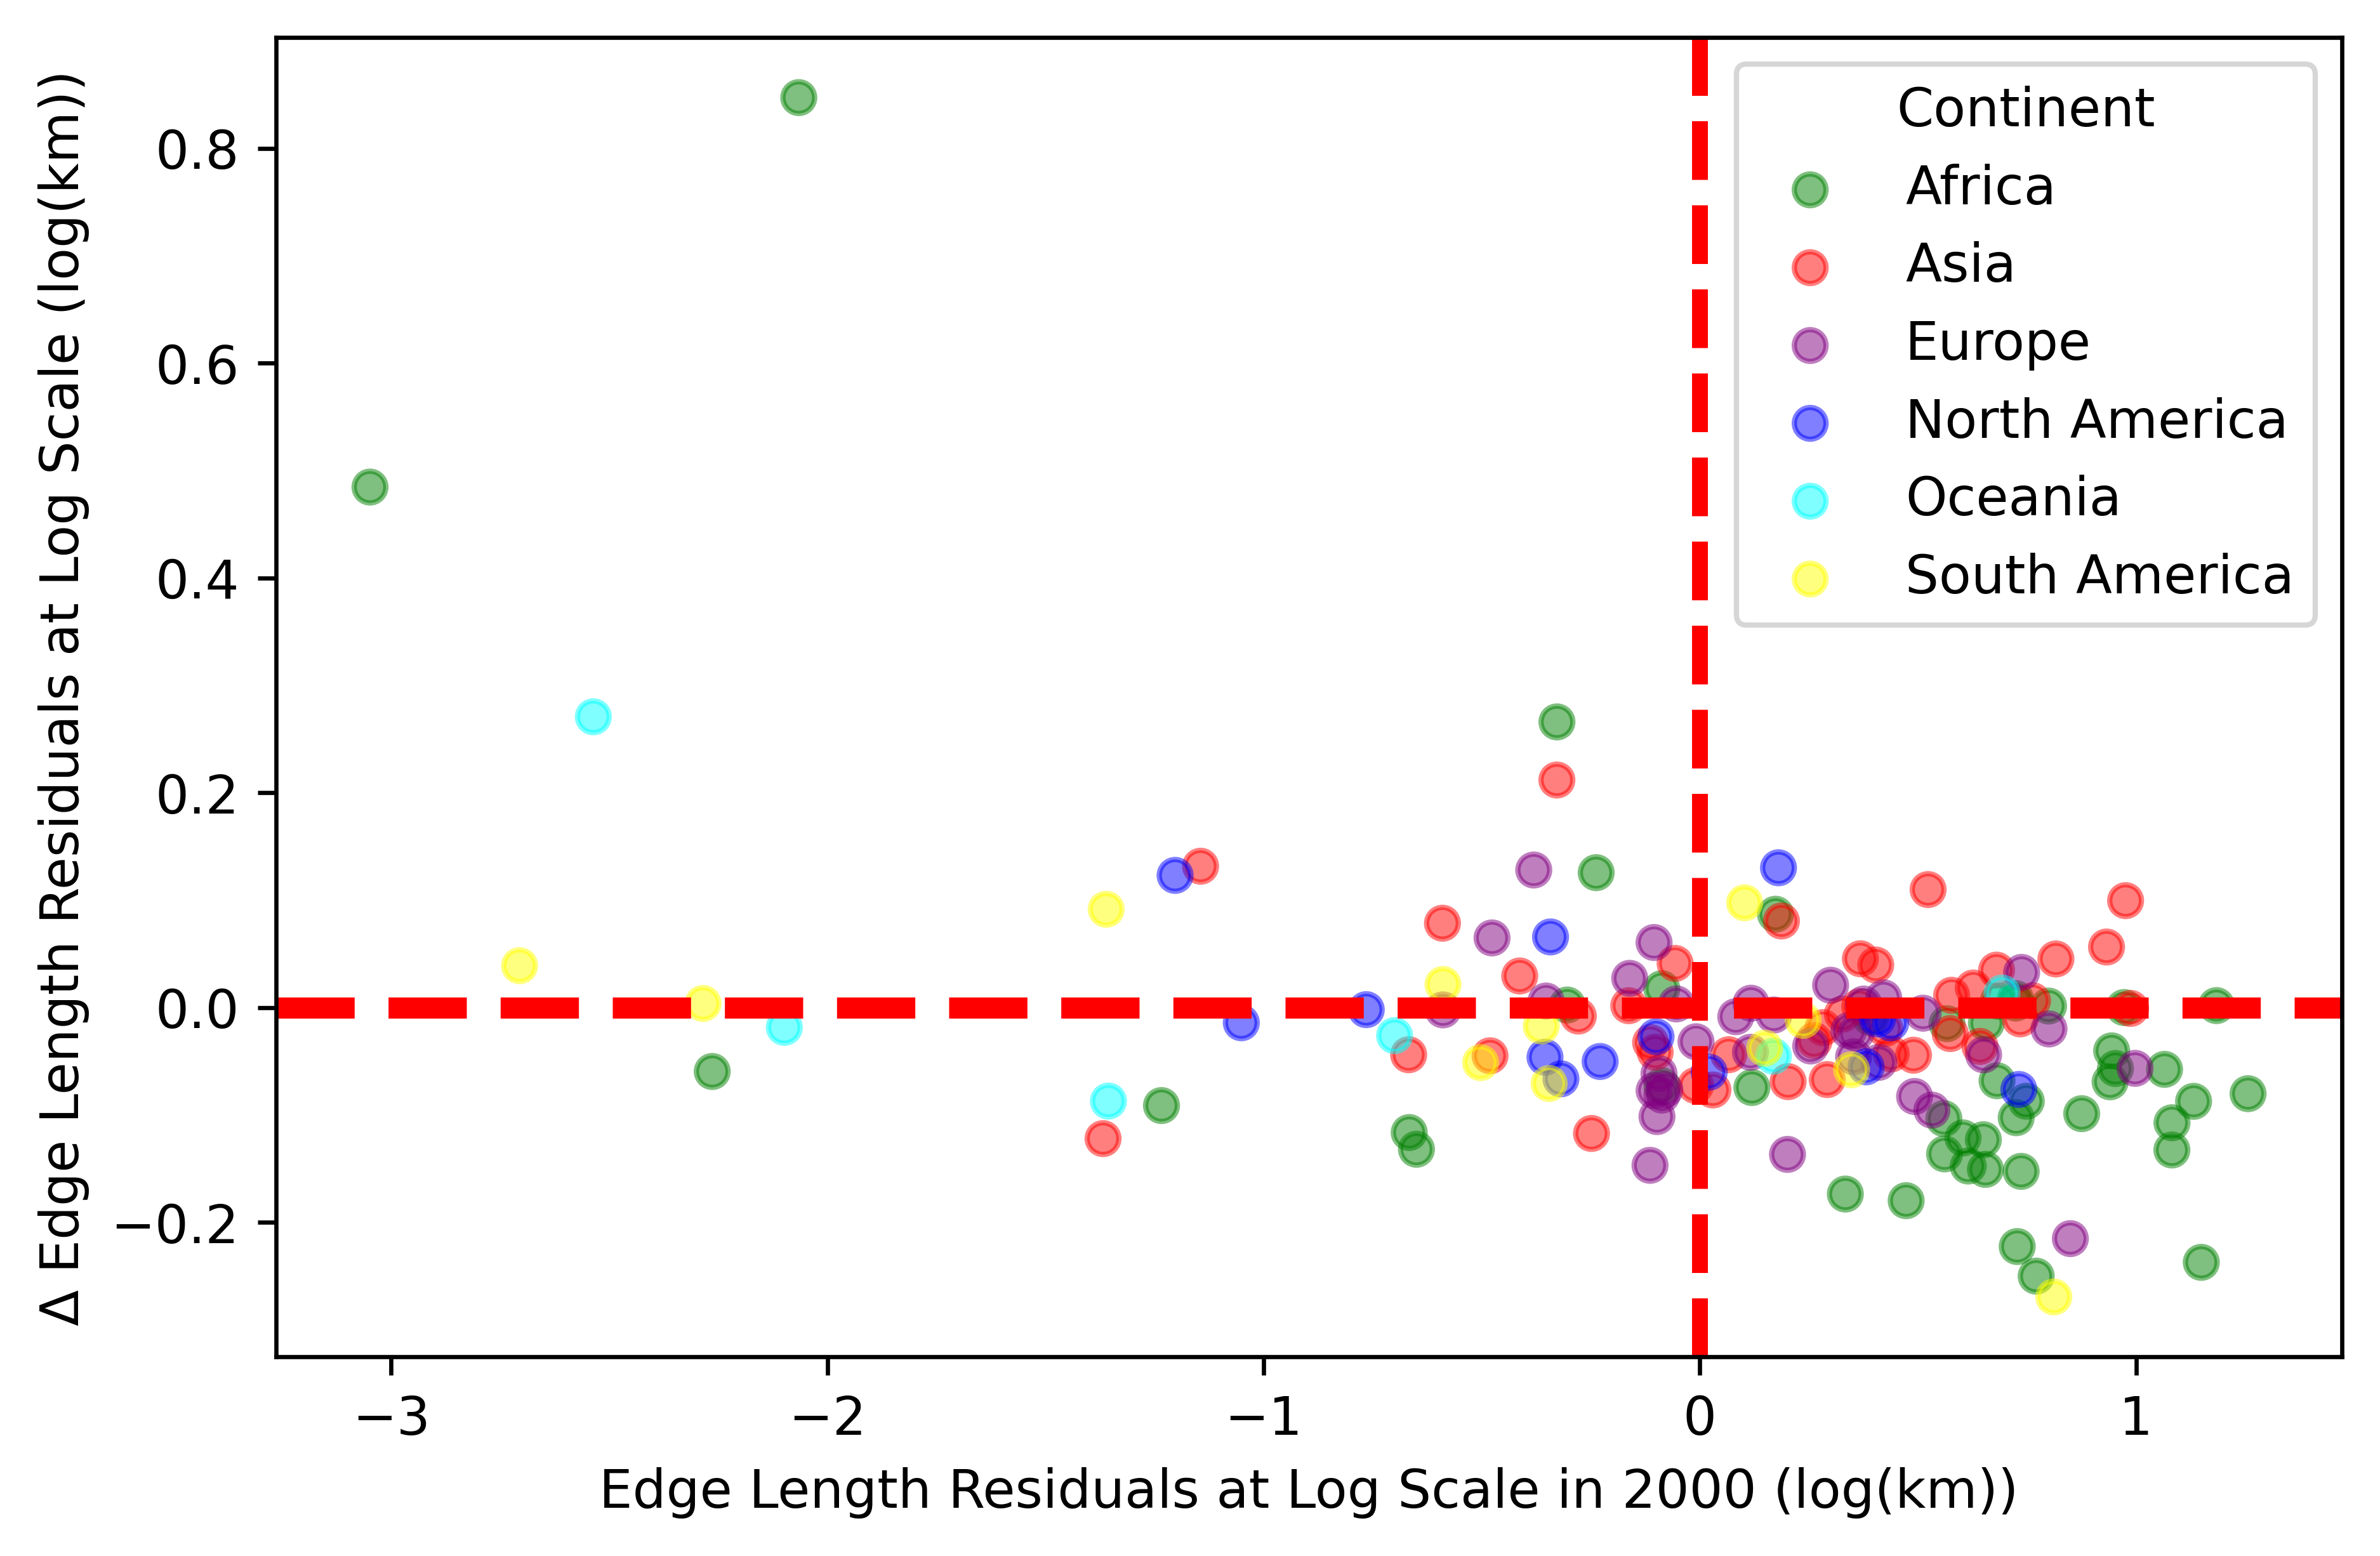

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader

# Load your country data
file_path = 'G:/Hangkai/Forest_edge_mapping_data/country_data_with_area.csv'
country_data = pd.read_csv(file_path)


china_row = country_data[country_data['country'] == 'China']
taiwan_row = country_data[country_data['country'] == 'Taiwan']

if not china_row.empty and not taiwan_row.empty:
    columns_to_sum = country_data.columns.difference(['country'])
    for column in columns_to_sum:
        country_data.loc[country_data['country'] == 'China', column] += taiwan_row[column].values[0]
    country_data = country_data[country_data['country'] != 'Taiwan']

country_data.head()


from scipy import stats
import numpy as np

# Adjusting the Python code provided to run the residuals computation and output the regression statistics

# Variables for the calculations
log_forest_area = np.log(country_data['Total Forest Area 2000'])
log_forest_edge = np.log(country_data['2000 edge length (KM)'])

# Linear regression on the log-transformed data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_forest_area, log_forest_edge)

def log_log_regression_model(log_x):
    return intercept + slope * log_x

log_estimated_forest_edge = log_log_regression_model(log_forest_area)
estimated_forest_edge = np.exp(log_estimated_forest_edge)

# Calculating residuals for 2000
country_data['log_residuals2000'] = log_forest_edge - log_estimated_forest_edge

# Calculating residuals for 2020
log_forest_edge_2020 = np.log(country_data['2020  edge length (KM)'])
log_forest_area_2020 = np.log(country_data['Total Forest Area 2020'])

log_estimated_forest_edge_2020 = log_log_regression_model(log_forest_area_2020)
estimated_forest_edge_2020 = np.exp(log_estimated_forest_edge_2020)

country_data['log_residuals2020'] = log_forest_edge_2020 - log_estimated_forest_edge_2020

# Calculating delta residuals
country_data['delta_residuals'] = country_data['log_residuals2020'] - country_data['log_residuals2000']

# Output the results of the regression and the residuals
slope, np.exp(intercept), r_value ** 2, p_value, country_data[['country', 'log_residuals2000', 'log_residuals2020', 'delta_residuals']].head()



# Load the shapefile using Cartopy
shapefile = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shapefile)

# Create a dictionary mapping from country names to continents
country_to_continent = {country.attributes['NAME_LONG']: country.attributes['CONTINENT'] for country in reader.records()}

# Map each country in your dataframe to its continent
country_data['continent'] = country_data['country'].map(country_to_continent)

# Define colors for each continent
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
    'Antarctica': 'white'
}

# Map continents to colors in the dataframe
country_data['color'] = country_data['continent'].map(colors)

# Scatter plot using colors based on continent
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=600)
config = {"font.family":'Helvetica'}
for continent, group in country_data.groupby('continent'):
    ax.scatter(group['log_residuals2000'], group['delta_residuals'], color=group['color'], alpha=0.5,  label=continent)

# Adding clarity to the plot
ax.axhline(0, color='red', linestyle='--', lw=4)
ax.axvline(0, color='red', linestyle='--', lw=3)
ax.set_xlabel('Edge Length Residuals at Log Scale in 2000 (log(km))')
ax.set_ylabel('Δ Edge Length Residuals at Log Scale (log(km))')
# ax.grid(True)
ax.legend(title="Continent")

# Saving and showing the plot
plt_path = 'C:/Users/hyou34/Desktop/plotting/Polished_Forest_Edge_Dynamics_Plot.png'
plt.savefig(plt_path)
plt.show()

In [7]:
country_data

country  stable edge length (KM)  \
0          Indonesia             2.932940e+06   
1           Malaysia             2.921738e+05   
2              Chile             1.523514e+06   
3            Bolivia             1.548777e+06   
4               Peru             9.658076e+05   
..               ...                      ...   
183  Solomon Islands             1.530272e+04   
184         Maldives             4.439000e-01   
185          Vanuatu             1.496664e+04   
186            Palau             1.250302e+03   
187          Bahrain             2.170900e+01   

     increase increase edge length (KM)  increase decrease edge length (KM)  \
0                           377782.3233                        1.695902e+06   
1                            63868.5001                        4.056648e+05   
2                           138571.9005                        1.537945e+05   
3                           158406.1880                        3.894838e+05   
4                           107564.7010                        2.902844e+05   
..                                  ...                                 ...   
183                            485.4232                        1.226473e+04   
184                              0.0555                        0.000000e+00   
185                             72.4189                        1.118737e+03   
186                             10.6680                        7.981590e+01   
187                             43.1206                        0.000000e+00   

     decrease increase edge length (KM)  decrease decrease edge length (KM)  \
0                          1.458103e+06                         961649.1245   
1                          2.826837e+05                         114750.2688   
2                          2.339075e+05                         168476.3205   
3                          2.318779e+05                         372328.9704   
4                          1.654066e+05                         123367.8996   
..                                  ...                                 ...   
183                        2.466483e+03                           3776.4125   
184                        5.550000e-02                              0.0000   
185                        1.777764e+02                           1350.2075   
186                        7.888220e+01                             90.9490   
187                        7.159600e+00                              0.0000   

     total increase edge length (KM)  total decrease edge length (KM)  \
0                       2.073684e+06                     2.419752e+06   
1                       4.695333e+05                     3.974340e+05   
2                       2.923664e+05                     4.023838e+05   
3                       5.478900e+05                     6.042069e+05   
4                       3.978491e+05                     2.887745e+05   
..                               ...                              ...   
183                     1.275016e+04                     6.242895e+03   
184                     5.550000e-02                     5.550000e-02   
185                     1.191156e+03                     1.527984e+03   
186                     9.048390e+01                     1.698312e+02   
187                     4.312060e+01                     7.159600e+00   

     2000 edge length (KM)  2020  edge length (KM)  \
0             5.352691e+06            5.006624e+06   
1             6.896077e+05            7.617070e+05   
2             1.925898e+06            1.815880e+06   
3             2.152984e+06            2.096667e+06   
4             1.254582e+06            1.363657e+06   
..                     ...                     ...   
183           2.154561e+04            2.805287e+04   
184           4.994000e-01            4.994000e-01   
185           1.649462e+04            1.615779e+04   
186           1.420133e+03            1.340786e+03   
187           2.886860e+01            6.482960e+01   



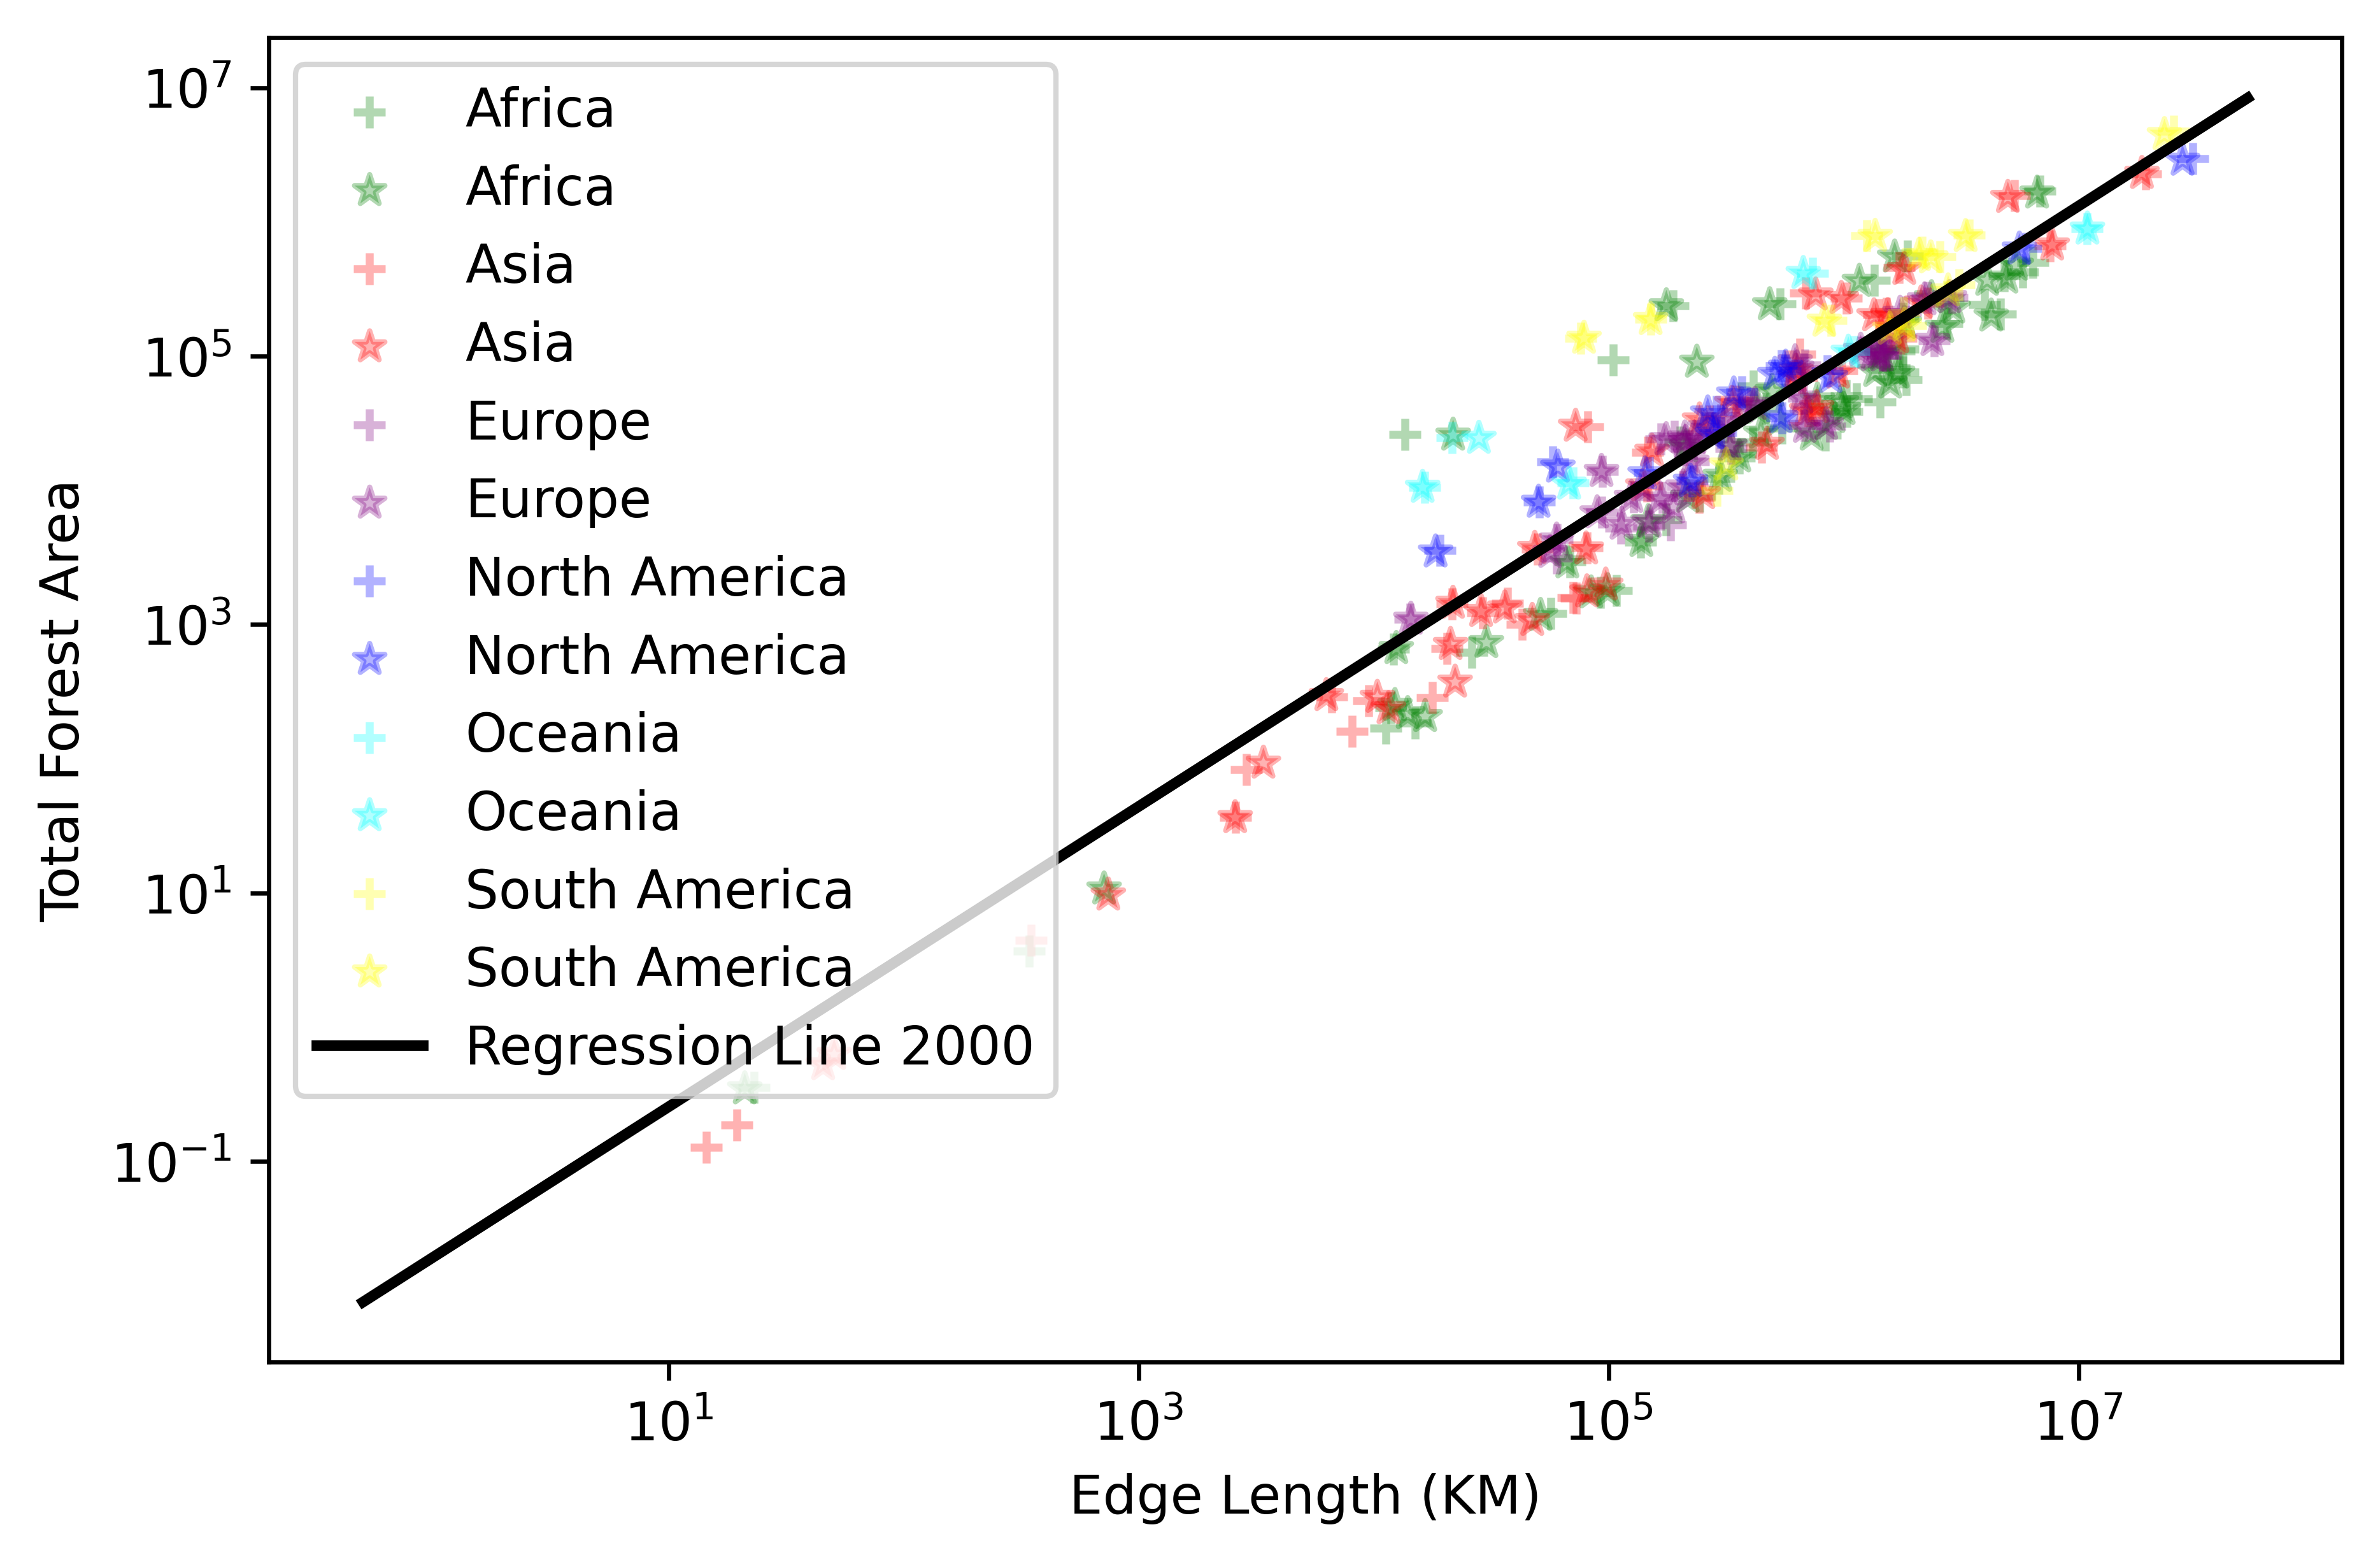

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader

# Load your country data
file_path = 'G:/Hangkai/Forest_edge_mapping_data/country_data_with_area.csv'
country_data = pd.read_csv(file_path)


china_row = country_data[country_data['country'] == 'China']
taiwan_row = country_data[country_data['country'] == 'Taiwan']

if not china_row.empty and not taiwan_row.empty:
    columns_to_sum = country_data.columns.difference(['country'])
    for column in columns_to_sum:
        country_data.loc[country_data['country'] == 'China', column] += taiwan_row[column].values[0]
    country_data = country_data[country_data['country'] != 'Taiwan']

country_data.head()


import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import numpy as np
from scipy import stats

# Load the shapefile using Cartopy
shapefile = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shapefile)

# Create a dictionary mapping from country names to continents
country_to_continent = {country.attributes['NAME_LONG']: country.attributes['CONTINENT'] for country in reader.records()}

# Assuming 'country_data' is your DataFrame with country data
# Map each country in your dataframe to its continent
country_data['continent'] = country_data['country'].map(country_to_continent)

# Define colors for each continent
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
    'Antarctica': 'white'
}

# Map continents to colors in the dataframe
country_data['color'] = country_data['continent'].map(colors)

# Scatter plot using colors based on continent
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=600)

# Plot data with log scale
for continent, group in country_data.groupby('continent'):
    ax.scatter(group['2000 edge length (KM)'], group['Total Forest Area 2000'], color=group['color'], alpha=0.3, label=continent, marker="+")
    ax.scatter(group['2020  edge length (KM)'], group['Total Forest Area 2020'], color=group['color'], alpha=0.3, label=continent, marker="*")

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Perform regression on the 2000 data
x = country_data['2000 edge length (KM)']
y = country_data['Total Forest Area 2000']
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(x), np.log10(y))

# Plot regression line
x_vals = np.linspace(min(x), max(x), 100)
y_vals = 10 ** (slope * np.log10(x_vals) + intercept)
ax.plot(x_vals, y_vals, color='black', linestyle='-', label='Regression Line 2000',lw =2)

# Adding clarity to the plot
ax.legend()
ax.set_xlabel('Edge Length (KM)')
ax.set_ylabel('Total Forest Area')

# Saving and showing the plot
plt.show()

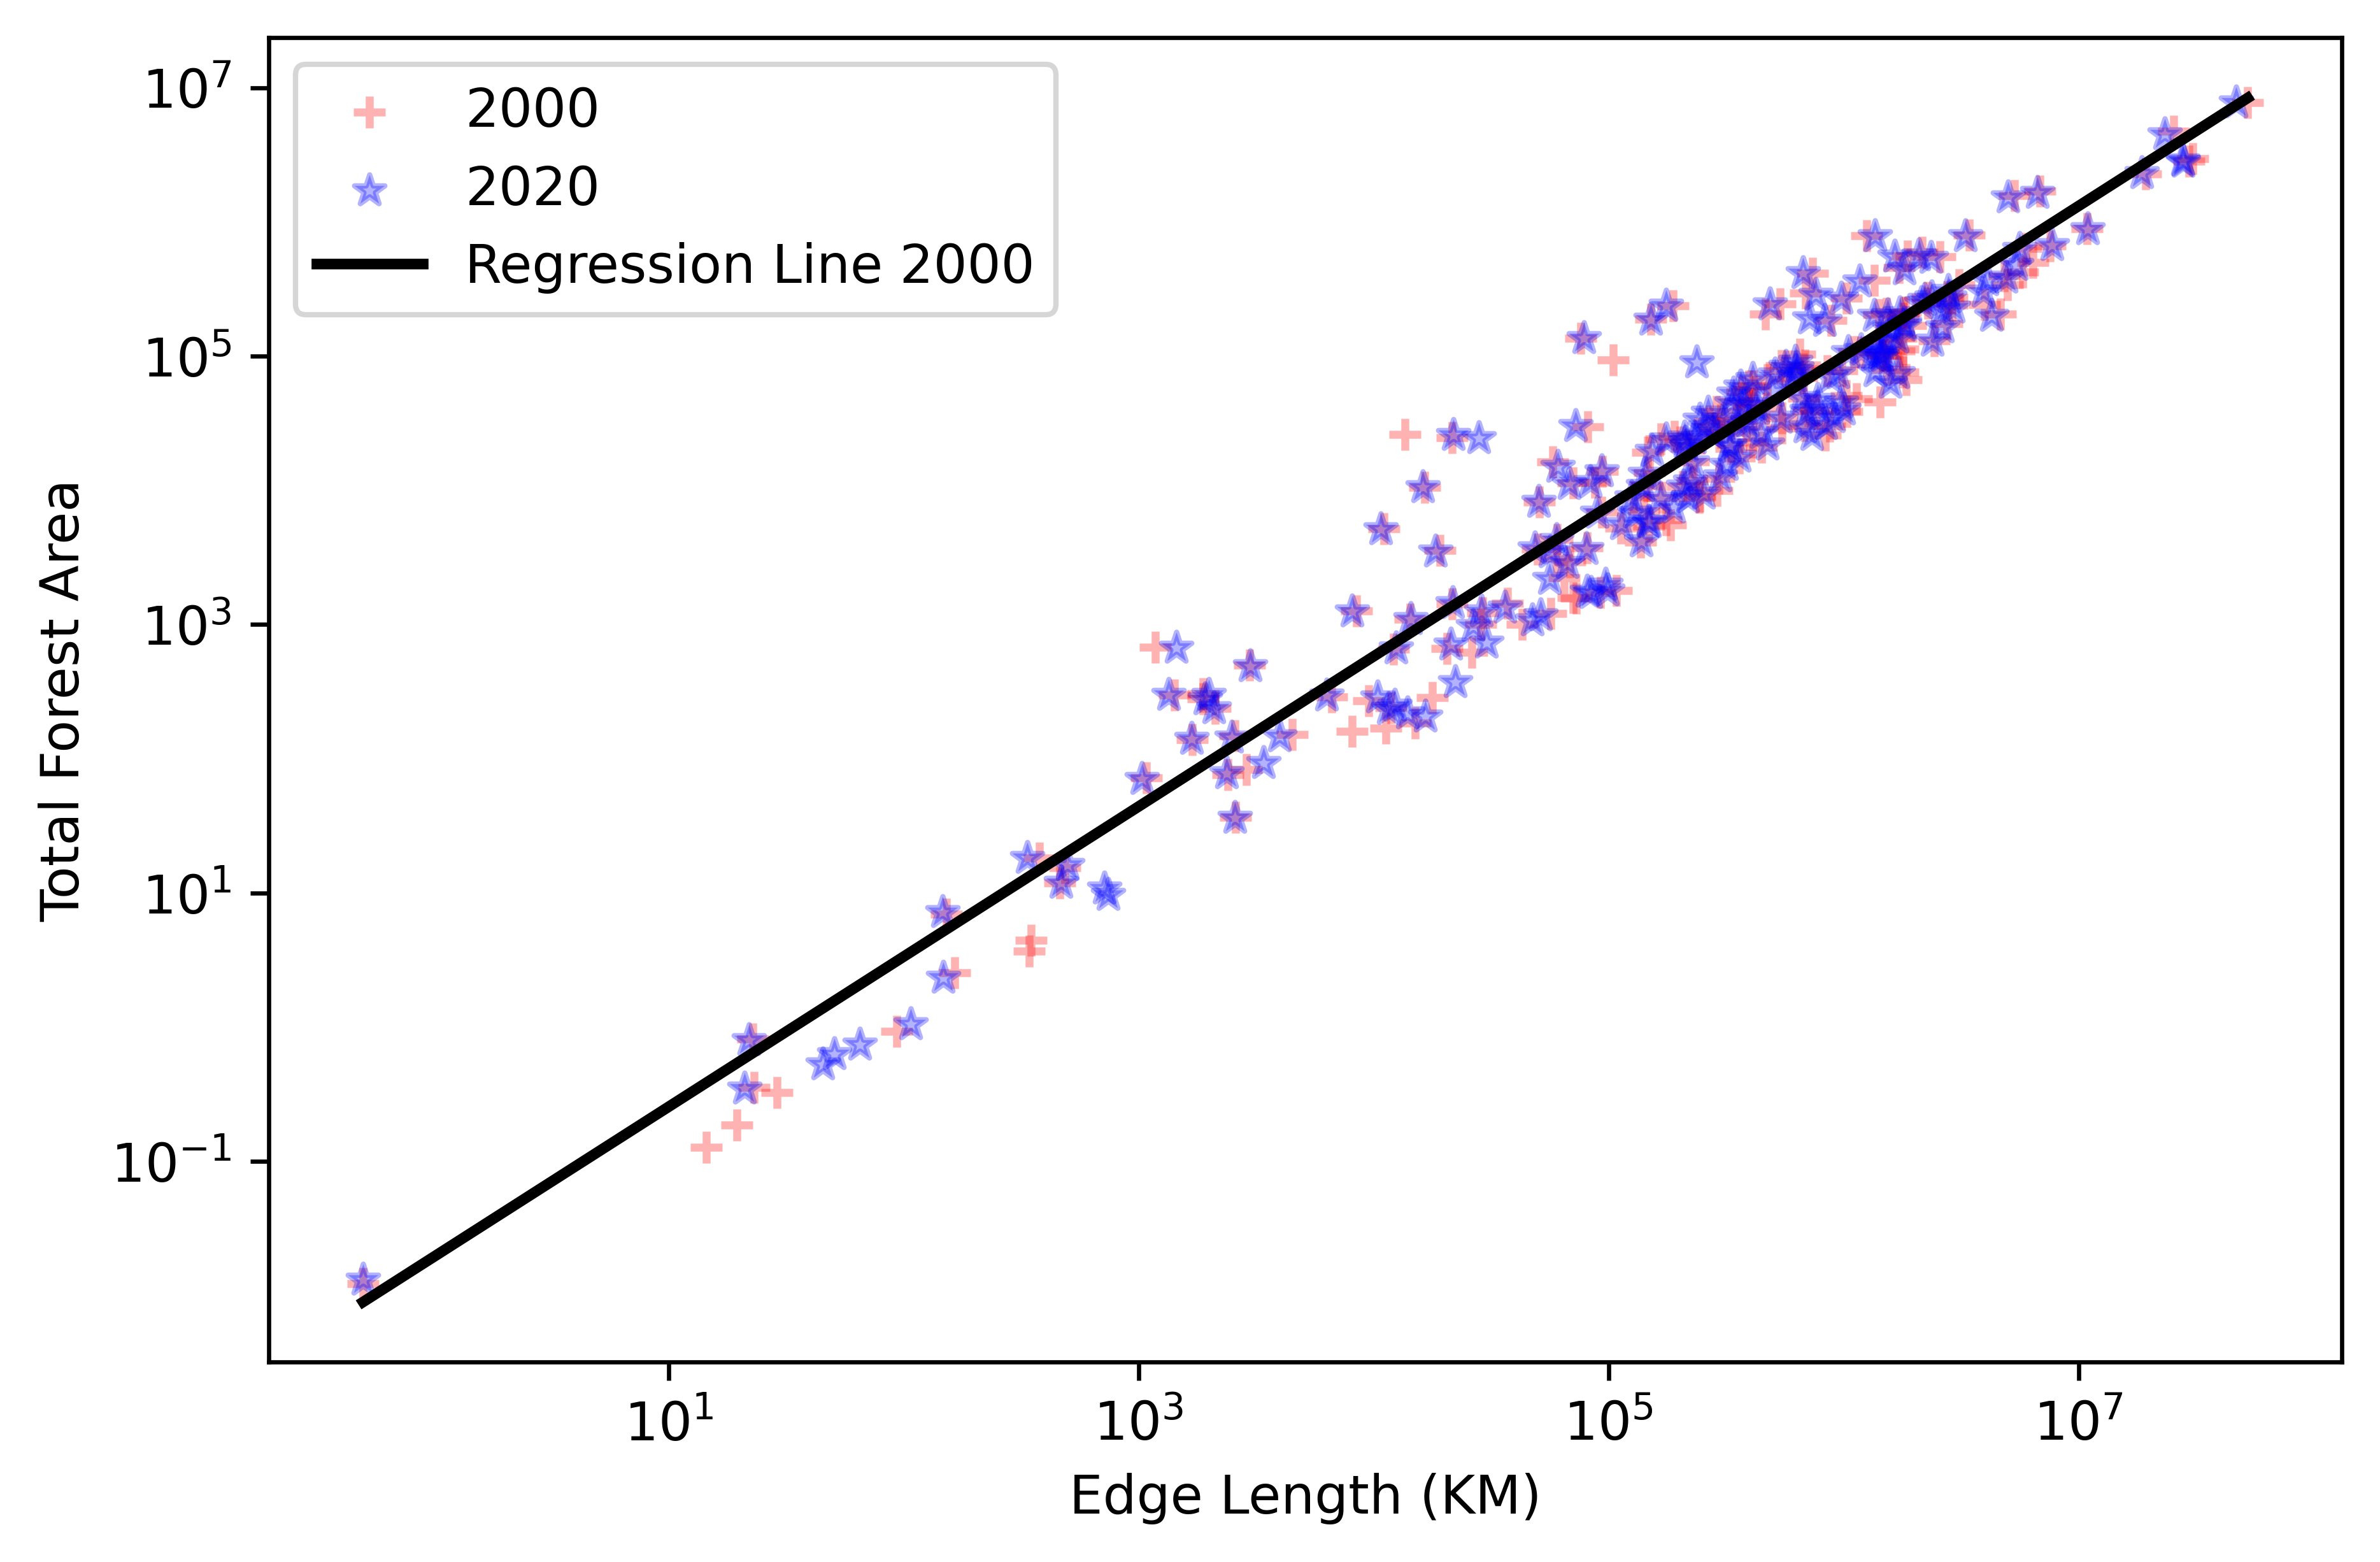

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader

# Load your country data
file_path = 'G:/Hangkai/Forest_edge_mapping_data/country_data_with_area.csv'
country_data = pd.read_csv(file_path)


china_row = country_data[country_data['country'] == 'China']
taiwan_row = country_data[country_data['country'] == 'Taiwan']

if not china_row.empty and not taiwan_row.empty:
    columns_to_sum = country_data.columns.difference(['country'])
    for column in columns_to_sum:
        country_data.loc[country_data['country'] == 'China', column] += taiwan_row[column].values[0]
    country_data = country_data[country_data['country'] != 'Taiwan']

country_data.head()


import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import numpy as np
from scipy import stats

# Load the shapefile using Cartopy
shapefile = shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shapefile)

# Create a dictionary mapping from country names to continents
country_to_continent = {country.attributes['NAME_LONG']: country.attributes['CONTINENT'] for country in reader.records()}

# Assuming 'country_data' is your DataFrame with country data
# Map each country in your dataframe to its continent
country_data['continent'] = country_data['country'].map(country_to_continent)

# Define colors for each continent
colors = {
    'Asia': 'red',
    'Africa': 'green',
    'North America': 'blue',
    'South America': 'yellow',
    'Europe': 'purple',
    'Oceania': 'cyan',
    'Antarctica': 'white'
}

# Map continents to colors in the dataframe
country_data['color'] = country_data['continent'].map(colors)

# Scatter plot using colors based on continent
fig, ax = plt.subplots(figsize=(7, 4.5), dpi=600)

# Plot data with log scale
ax.scatter(country_data['2000 edge length (KM)'], country_data['Total Forest Area 2000'], color="red", alpha=0.3, label="2000", marker="+")
ax.scatter(country_data['2020  edge length (KM)'], country_data['Total Forest Area 2020'], color="blue", alpha=0.3, label="2020", marker="*")

# Set log scale for both axes
ax.set_xscale('log')
ax.set_yscale('log')

# Perform regression on the 2000 data
x = country_data['2000 edge length (KM)']
y = country_data['Total Forest Area 2000']
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(x), np.log10(y))

# Plot regression line
x_vals = np.linspace(min(x), max(x), 100)
y_vals = 10 ** (slope * np.log10(x_vals) + intercept)
ax.plot(x_vals, y_vals, color='black', linestyle='-', label='Regression Line 2000',lw =2)

# Adding clarity to the plot
ax.legend()
ax.set_xlabel('Edge Length (KM)')
ax.set_ylabel('Total Forest Area')

# Saving and showing the plot
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

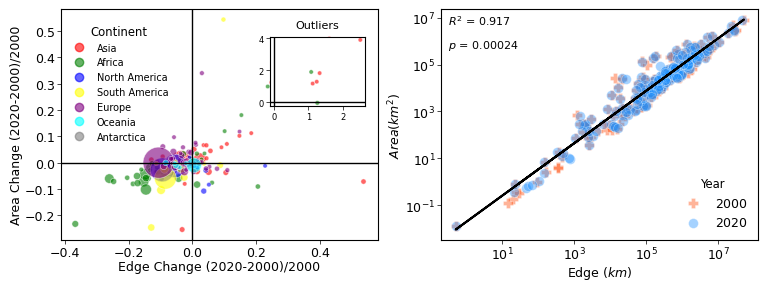

In [10]:
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from tqdm import tqdm
import cartopy.crs as ccrs
import cartopy.feature as cf
from scipy.ndimage import zoom
from scipy.signal import savgol_filter
import matplotlib.ticker as mticker
import matplotlib.ticker as mtick
import matplotlib as mpl
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime
from scipy import stats
from PIL import ImageColor
from matplotlib.colors import rgb2hex
from matplotlib.colors import to_rgba
import matplotlib.colors as mcolors
import geopandas as gpd
import xarray as xr
import matplotlib as mpl
import matplotlib.patches as mpatches
from shapely.geometry import mapping
from matplotlib import gridspec
from matplotlib.lines import Line2D
import cartopy.io.shapereader as shpreader
warnings.filterwarnings('ignore')

# import forest edge dynamics statistics data.
df = pd.read_csv('G:/Hangkai/Forest_edge_mapping_data/processed_country_data_with_area.csv')
# import the world shapefiles
world_filepath = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(world_filepath)
countries = [country.attributes['NAME'] for country in reader.records()]
continents = [country.attributes['CONTINENT'] for country in reader.records()]
country_to_continent = dict(zip(countries, continents))
df['continent'] = df['country'].map(country_to_continent)

colors = {'Asia': 'red','Africa': 'green','North America': 'blue','South America': 'yellow','Europe': 'purple','Oceania': 'cyan','Antarctica': 'gray'}
df['Edge Change'] = df['Edge Change'].astype(float)
df['Area Change'] = df['Area Change'].astype(float)
df = df.dropna(subset=['Edge Change', 'Area Change'])

edge_change_threshold = 3 * df['Edge Change'].std()
area_change_threshold = 3 * df['Area Change'].std()
subset_df = df[(abs(df['Edge Change']) <= edge_change_threshold)& (abs(df['Area Change']) <= area_change_threshold)]


country_data = df.copy()
country_data = country_data[['country','Total Forest Area 2000','Total Forest Area 2020','forest edge 2000','forest edge 2020']]

selected_rows =country_data[(country_data['country'] == 'China') | (country_data['country'] == 'Taiwan')]
filtered_country_data = country_data[~((country_data['country'] == 'China') | (country_data['country'] == 'Taiwan'))]
new_china = pd.DataFrame(selected_rows.sum(axis = 0)).T
new_china['country'] = 'China'

country_data = pd.concat([filtered_country_data, new_china],axis = 0)
country_data.reset_index(drop = True, inplace = True)

# Taking logarithms of the 'Total Forest Area 2000' and 'forest edge 2020' for power-law fitting
log_forest_area_2000 = np.log(country_data['Total Forest Area 2000'].astype(float))
log_forest_edge_2000 = np.log(country_data['forest edge 2000'].astype(float))
slope_2000, intercept_2000, r_value_2000, p_value_2000, std_err_2000 = stats.linregress(log_forest_edge_2000, log_forest_area_2000)

log_estimated_forest_area_2000 = intercept_2000 + slope_2000 * log_forest_edge_2000
estimated_forest_area_2000 = np.exp(log_estimated_forest_area_2000)

country_data['log_residuals2000'] = log_forest_area_2000 - log_estimated_forest_area_2000
country_data['log_fragmentation_rank2000'] = country_data['log_residuals2000'].abs().rank(method='min', ascending=True)

### 2020
log_forest_area_2020 = np.log(country_data['Total Forest Area 2020'].astype(float))
log_forest_edge_2020 = np.log(country_data['forest edge 2020'].astype(float))
slope_2020, intercept_2020, r_value_2020, p_value_2020, std_err_2020 = stats.linregress(log_forest_edge_2020, log_forest_area_2020)

log_estimated_forest_area_2020 = intercept_2020 + slope_2020 * log_forest_edge_2020
estimated_forest_area_2020 = np.exp(log_estimated_forest_area_2020)

country_data['log_residuals2020'] = log_forest_area_2020 - log_estimated_forest_area_2020
country_data['log_fragmentation_rank2020'] = country_data['log_residuals2020'].abs().rank(method='min', ascending=True)

def get_color1(deviation):
    max_deviation = max(abs(country_data['log_residuals2000']))
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'
    
def get_color2(deviation):
    max_deviation = max((country_data['log_residuals2020']-country_data['log_residuals2000']))
    color_intensity = np.abs(deviation) / max_deviation
    if color_intensity > 1:
        color_intensity = 1
    if deviation < 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation > 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'white'
def base_map(ax):
    states_provinces = cf.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',
                                              scale='50m',facecolor='none')
    ax.set_extent([-180, 180, -60, 85])
    ax.add_feature(cf.LAND,alpha=0.1)
    ax.add_feature(cf.BORDERS, linestyle='--',lw=0.4, alpha=0.5)
    ax.add_feature(cf.LAKES, alpha=0.5)
    ax.add_feature(cf.OCEAN,alpha=0.05)
    ax.add_feature(cf.COASTLINE,lw=0.4)
    ax.add_feature(cf.RIVERS,lw=0.2)
    ax.add_feature(states_provinces,lw=0.2,edgecolor='gray')
    ax.set_xticks([-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180])                      
    ax.set_yticks([-30,0, 30, 60])
    ax.set_yticklabels([x.get_text() for x in ax.get_yticklabels()],rotation=90, va='center')
    ax.xaxis.set_major_formatter(LongitudeFormatter())                    
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.tick_params(axis='both',which='major',labelsize=9,direction='out',length=3,width=0.5,pad=1.3,labelleft = True, labelbottom = True,
                    bottom=True,left=True,top=False,right=False)
    ax.spines['geo'].set_linewidth(0.7)
    return
def rsquared(x, y): 
    """Return the metriscs coefficient of determination (R2)
    Parameters:
    -----------
    x (numpy array or list): Predicted variables
    y (numpy array or list): Observed variables
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) 
    a = r_value**2
    return a

world_filepath = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_0_countries')
countries_shp = gpd.read_file(world_filepath)
# countries_shp = countries_shp.iloc[0:10,:]



fig,(ax1,ax2) = plt.subplots(1,2, figsize = (9,3))
config = {"font.family":'Helvetica'}
plt.subplots_adjust(hspace =0.2,wspace =0.2)
plt.rcParams.update(config)

# bubble sizes
min_size = 10
max_size = 500

# calculate the bubble size for each country
min_area = df['forest edge 2000'].min()
max_area = df['forest edge 2000'].max()
bubble_sizes = ((df['forest edge 2000'] - min_area) / (max_area - min_area) * (max_size - min_size) + min_size)

for continent, color in colors.items():
    subset = subset_df[subset_df['continent'] == continent]
    subset_bubble_sizes = bubble_sizes[subset.index] # ?????????
    ax1.scatter(subset['Edge Change'], subset['Area Change'], s=subset_bubble_sizes, color=color, alpha=0.6, edgecolors="w", linewidth=0.5)
    ax1.scatter([], [], s=150, color=color, label=continent, alpha=0.6, edgecolors="w", linewidth=0.5)

# ax1.text(0,1.05, '(a) Forest Dynamics (Country level)', transform=ax1.transAxes, fontsize = 10,fontweight='bold')
# ax1.text(0.01, 0.95, 'The size of bubbles indicate the edge of 2000',transform=ax1.transAxes, fontsize = 8)
ax1.tick_params(axis='both',which='major',labelsize=9,direction='out',length=3,width=0.5,pad=1.3,labelleft = True, labelbottom = True,
                bottom=True,left=True,top=False,right=False)

ax1.set_xlabel('Edge Change (2020-2000)/2000',fontsize=9,labelpad = 1)
ax1.set_ylabel('Area Change (2020-2000)/2000',fontsize=9,labelpad = 1)

legend = ax1.legend()
handles = legend.legendHandles
labels = [text.get_text() for text in legend.get_texts()]
original_colors = [handle.get_facecolor() for handle in handles]
new_handles = [Line2D([0], [0], marker='o', label=label, color=color, markersize=6, linestyle='None') for label, color in zip(labels, original_colors)]
legend.remove()
ax1.legend(handles=new_handles, labels=labels, title='Continent', bbox_to_anchor=(0, 0.97),
           title_fontsize='small', loc='upper left', fontsize=7, facecolor='none', edgecolor='none')

ax1.axvline(0, color='black', linestyle='-', linewidth=1)  # x=0 line
ax1.axhline(0, color='black', linestyle='-', linewidth=1)  # y=0 line

axes = inset_axes(ax1, width="30%", height="30%", loc='lower right', bbox_to_anchor=(-0.02, 0.55, 1, 1),bbox_transform=ax1.transAxes)
for continent, color in colors.items():
    outliers = df[(abs(df['Edge Change']) > edge_change_threshold)
        | (abs(df['Area Change']) > area_change_threshold)]
    subset = outliers[outliers['continent'] == continent]
    subset_bubble_sizes = bubble_sizes[subset.index] # ?????????
    axes .scatter(subset['Edge Change'], subset['Area Change'], s=subset_bubble_sizes, color=color, alpha=0.6, edgecolors="w", linewidth=0.5)
    
axes.set_title('Outliers',fontsize = 8)
axes.axvline(0, color='black', linestyle='-', linewidth=1) 
axes.axhline(0, color='black', linestyle='-', linewidth=1)
axes.tick_params(axis='both',which='major',labelsize=6,direction='out',length=3,width=0.5,pad=1.3,labelleft = True, labelbottom = True,
                bottom=True,left=True,top=False,right=False)

########################################
ax2.scatter(df['forest edge 2000'], df['Total Forest Area 2000'], color='orangered', label='2000', alpha=0.4, edgecolors='w', linewidth=0.5, marker = "P",s = 50)
ax2.scatter(df['forest edge 2020'], df['Total Forest Area 2020'], color='dodgerblue', label='2020', alpha=0.4, edgecolors='w', linewidth=0.5,marker = "o", s = 50)
coeffs_2000 = np.polyfit(np.log(df['forest edge 2000']), np.log(df['Total Forest Area 2000']), 1)
ax2.plot(df['forest edge 2000'], np.exp(coeffs_2000[1]) * df['forest edge 2000'] ** coeffs_2000[0], color='black', linestyle='-')
coeffs_2020 = np.polyfit(np.log(df['forest edge 2020']), np.log(df['Total Forest Area 2020']), 1)
#ax2.plot(df['forest edge 2020'], np.exp(coeffs_2020[1]) * df['forest edge 2020'] ** coeffs_2020[0], color='dodgerblue', linestyle='-.')

a_2000 = np.exp(coeffs_2000[1])
b_2000 = coeffs_2000[0]
a_2020 = np.exp(coeffs_2020[1])
b_2020 = coeffs_2020[0]

# ax2.text(0,1.05, '(b) Forest Edge --- Area Relationships', transform=ax2.transAxes, fontsize = 10,fontweight='bold')
#ax2.text(0.02, 0.93, f"2000: Area = {a_2000:.4f} * Edge^{b_2000:.5f}", transform=ax2.transAxes, color='black', fontsize=8)
#ax2.text(0.02, 0.83, f"2020: Area = {a_2020:.4f} * Edge^{b_2020:.5f}", transform=ax2.transAxes, color='dodgerblue', fontsize=8)

R2_2000 = rsquared(df['forest edge 2000'], df['Total Forest Area 2000'])
R2_2020 = rsquared(df['forest edge 2020'], df['Total Forest Area 2020'])
ax2.text(0.02, 0.93, f"$R^2$ = {round(R2_2000,3)}", transform=ax2.transAxes, color='black', fontsize=8)
#ax2.text(0.02, 0.63, f"$R^2$ = {round(R2_2020,3)}", transform=ax2.transAxes, color='dodgerblue', fontsize=8)

_, p_value_2000 = stats.ttest_ind(df['forest edge 2000'], df['Total Forest Area 2000'])
_, p_value_2020 = stats.ttest_ind(df['forest edge 2020'], df['Total Forest Area 2020'])
ax2.text(0.02, 0.83, f"$p$ = {round(p_value_2000,5)}", transform=ax2.transAxes, color='black', fontsize=8)
# ax2.text(0.02, 0.43, f"$p$ = {round(p_value_2020,5)}", transform=ax2.transAxes, color='dodgerblue', fontsize=8)

# Labeling and titling
ax2.set_xlabel('Edge ($km$)',fontsize=9,labelpad = 1)
ax2.set_ylabel('$Area (km^2)$',fontsize=9,labelpad = 1)
# ax2.set_title('Scatter Plot: Area vs Edge for 2000 and 2020 with Fitted Lines')
ax2.legend(title='Year',title_fontsize='small', scatterpoints=1, loc = 'lower right',fontsize=9,facecolor= 'none',edgecolor = 'none')
ax2.tick_params(axis='both',which='major',labelsize=9,direction='out',length=3,width=0.5,pad=1.3,labelleft = True, labelbottom = True,
                bottom=True,left=True,top=False,right=False)

# Setting the axes to logarithmic scale
ax2.set_xscale('log')
ax2.set_yscale('log')
plt.savefig('C:/Users/hyou34/Desktop/plotting/Figure 3_Forest edge dynamics_statistics_V1.png', dpi=600, bbox_inches='tight')